In [ ]:
#  Making the neccessary imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data from CSV file
df = pd.read_csv('/content/drive/MyDrive/train_timeseries.csv')

In [ ]:
df.info()

In [ ]:
# Checking for NUll values in the data
df.isnull().sum()

In [ ]:
# Removing the null values in the target variable as the drought score is only available for once in 7 days.
# Processing data in batches
skipRows = 2000000
nRows = 2000000
df = pd.read_csv('/content/drive/MyDrive/train_timeseries.csv', nrows=2000000)
df = df.dropna()
print('here' , df.shape)
while True: 
    try:
        dfi = pd.read_csv('/content/drive/MyDrive/train_timeseries.csv', skiprows=skipRows, nrows=nRows, header=None)
        dfi.columns = df.columns
        dfi = dfi.dropna()
        print(dfi.shape)
        df = pd.concat([df, dfi], axis=0,ignore_index=False )
        print(df.shape)
        skipRows += nRows
    except:
        print('Finished processing')
        break;

here (285668, 21)
(285668, 21)
(571336, 21)
(285669, 21)
(857005, 21)
(285668, 21)
(1142673, 21)
(285668, 21)
(1428341, 21)
(285669, 21)
(1714010, 21)
(285668, 21)
(1999678, 21)
(285668, 21)
(2285346, 21)
(285668, 21)
(2571014, 21)
(185782, 21)
(2756796, 21)
Finished processing


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

fips           0
date           0
PRECTOT        0
PS             0
QV2M           0
T2M            0
T2MDEW         0
T2MWET         0
T2M_MAX        0
T2M_MIN        0
T2M_RANGE      0
TS             0
WS10M          0
WS10M_MAX      0
WS10M_MIN      0
WS10M_RANGE    0
WS50M          0
WS50M_MAX      0
WS50M_MIN      0
WS50M_RANGE    0
score          0
dtype: int64

In [ ]:
df.score.unique()

array([   nan, 1.    , 2.    , ..., 0.7399, 0.606 , 0.0886])

In [ ]:
# Taraget class has data values ranging from 0 to 5. 
# Where 0 indicates no drought and values ranging from 1 to 5 indicate low to severe drought.
df['score']

185        3.0
192        3.0
199        4.0
241        5.0
2376       2.0
          ... 
1295055    3.0
1295398    4.0
1295790    3.0
1296861    2.0
1297232    1.0
Name: score, Length: 77877, dtype: float64

In [ ]:
# Converting the target variables having continuous values to discrete values.
a = np.array(df['score'])
df['score']= np.ceil(a)

In [ ]:
df['score']

185        3.0
192        3.0
199        4.0
241        5.0
2376       2.0
          ... 
1295055    3.0
1295398    4.0
1295790    3.0
1296861    2.0
1297232    1.0
Name: score, Length: 77877, dtype: float64

In [ ]:
#Range of target values.
df.score.unique()

array([1., 2., 0., 3., 4., 5.])

In [ ]:
df['score']

185        3.0
192        3.0
199        4.0
241        5.0
2376       2.0
          ... 
1295055    3.0
1295398    4.0
1295790    3.0
1296861    2.0
1297232    1.0
Name: score, Length: 77877, dtype: float64

In [ ]:
df.columns

Index(['fips', 'date', 'PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'score'],
      dtype='object')

# Data Exploration

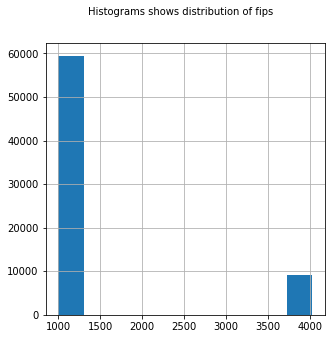

In [ ]:
# FIPS data distribution
df['fips'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of fips', fontsize=10);


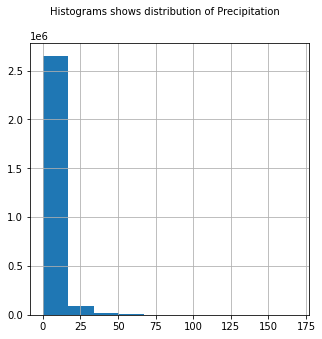

In [ ]:
# Plot for PRECTOT -> Precipitation (mm day-1)
df['PRECTOT'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Precipitation', fontsize=10);

In [ ]:
# Precipitation (mm day-1)
# sns.set(rc={'figure.figsize':(10,15)})
# sns.histplot(data=df, x='PRECTOT', stat='count', hue='score', multiple='stack', axis =1)
df.groupby(['PRECTOT', 'score'])[['score']].count()

score
PRECTOT score        
0.00    0.0    435759
        1.0    119377
        2.0     80005
        3.0     53880
        4.0     28064
...               ...
152.83  0.0         3
153.67  0.0         1
161.83  0.0         1
165.51  0.0         1
168.69  0.0         1

[22354 rows x 1 columns]

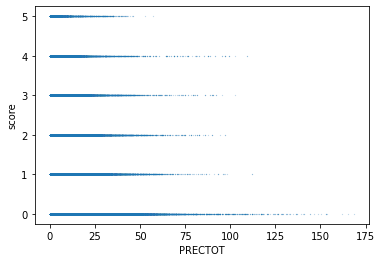

In [ ]:
 # Precipitation value with respect to target variable score
 ax2 = df.plot.scatter(x='PRECTOT', y='score', colormap='viridis', s= 0.01)


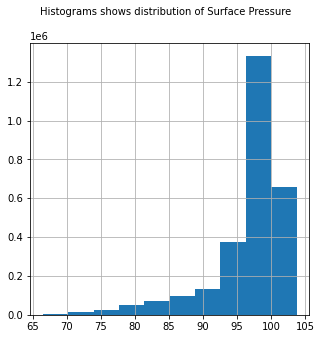

In [ ]:
#  Plot for PS -> Surface Pressure (kPa)
df['PS'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Surface Pressure', fontsize=10);
# plt.text(75, 0.8e7, 'PS', fontsize = 12)

In [ ]:
# Surface Pressure (kPa)
# sns.histplot(data=df, x='PS', stat='count', hue='score', multiple='stack')
df.groupby(['PS', 'score'])[['score']].count()

,,score
PS,score,
66.49,0.0,1
66.93,0.0,1
66.95,1.0,1
66.97,4.0,1
66.98,0.0,1
...,...,...
103.71,0.0,1
103.72,1.0,1
103.74,0.0,1


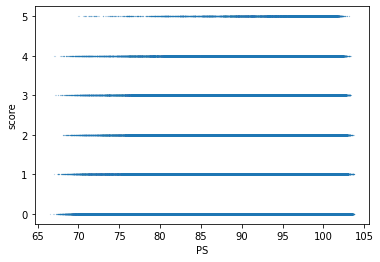

In [ ]:
 # Surface pressure with respect to the target variable
 ax2 = df.plot.scatter(x='PS', y='score', colormap='viridis', s= 0.01)

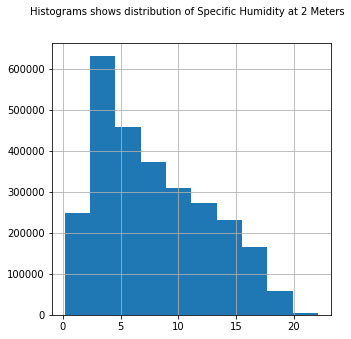

In [ ]:
# Plot for QV2M -> Specific Humidity at 2 Meters (g/kg)
df['QV2M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Specific Humidity at 2 Meters', fontsize=10);
# plt.text(15, 4e6, 'QV2M', fontsize = 12)

In [ ]:
# Specific Humidity at 2 Meters (g/kg)
# sns.histplot(data=df, x='QV2M', stat='count', hue='score', multiple='stack')
df.groupby(['QV2M', 'score'])[['score']].count()

score
QV2M  score       
0.14  0.0        1
0.15  0.0        1
0.16  0.0        2
      1.0        1
0.17  0.0        1
...            ...
21.91 0.0        4
21.92 0.0        2
21.95 0.0        2
21.97 0.0        1
22.12 0.0        1

[11942 rows x 1 columns]

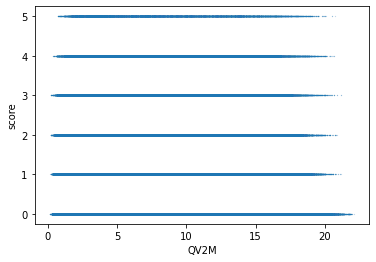

In [ ]:
 # Specific Humidity at 2 Meters (g/kg) with respect to the target variable
 ax2 = df.plot.scatter(x='QV2M', y='score', colormap='viridis', s= 0.01)

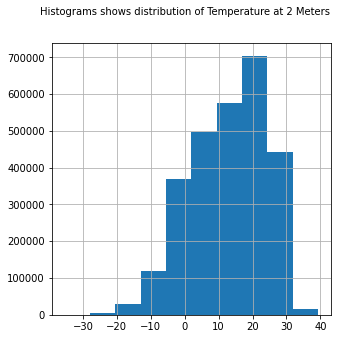

In [ ]:
# Plot for T2M -> Temperature at 2 Meters (C)
df['T2M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Temperature at 2 Meters ', fontsize=10);
# plt.text(-30, 4e6, 'T2M', fontsize = 12)

In [ ]:
# sns.histplot(data=df, x='T2M', stat='count', hue='score', multiple='stack')
df.groupby(['T2M', 'score'])[['score']].count()

,,score
T2M,score,
-35.44,0.0,1
-34.63,0.0,1
-33.94,0.0,1
-33.48,0.0,1
-33.33,0.0,1
...,...,...
38.87,4.0,2
38.91,4.0,2
38.92,1.0,1


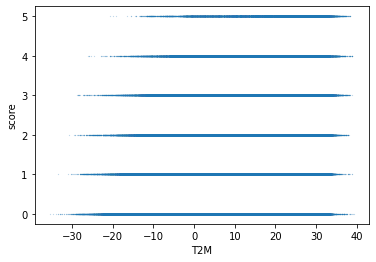

In [ ]:
 # Plot for T2M -> Temperature at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2M', y='score', colormap='viridis', s= 0.01)

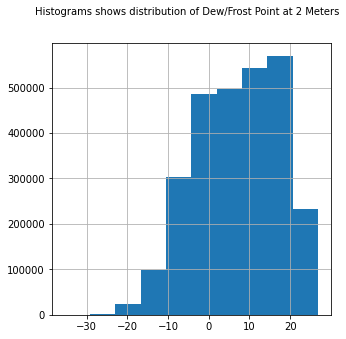

In [ ]:
# Plot for T2MDEW -> Dew/Frost Point at 2 Meters (C)
df['T2MDEW'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Dew/Frost Point at 2 Meters', fontsize=10);
# plt.text(-30, 3.5e6, 'T2MDEW', fontsize = 12)

In [ ]:
# sns.histplot(data=df, x='T2MDEW', stat='count', hue='score', multiple='stack')
df.groupby(['T2MDEW', 'score'])[['score']].count()

,,score
T2MDEW,score,
-35.44,0.0,1
-34.95,0.0,1
-34.21,0.0,1
-34.10,0.0,1
-33.98,0.0,1
...,...,...
26.39,0.0,4
26.48,0.0,3
26.49,0.0,2


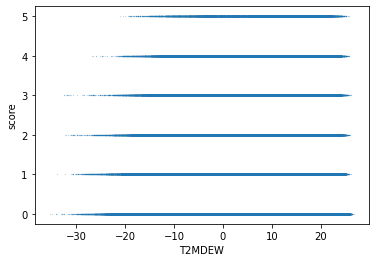

In [ ]:
# T2MDEW -> Dew/Frost Point at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2MDEW', y='score', colormap='viridis', s= 0.01)

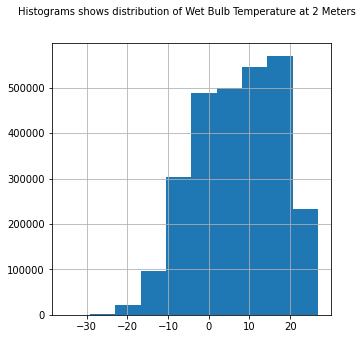

In [ ]:
# Plot for T2MWET -> Wet Bulb Temperature at 2 Meters (C)
df['T2MWET'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wet Bulb Temperature at 2 Meters', fontsize=10);
# plt.text(-30, 3.5e6, 'T2MWET', fontsize = 12)

In [ ]:
df.groupby(['T2MWET', 'score'])[['score']].count()

,,score
T2MWET,score,
-35.46,0.0,1
-34.75,0.0,1
-34.01,0.0,1
-33.77,0.0,1
-33.59,0.0,1
...,...,...
26.39,0.0,4
26.48,0.0,3
26.49,0.0,2


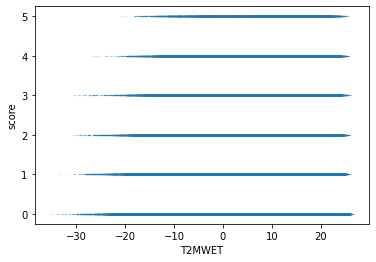

In [ ]:
 # Plot for T2MWET -> Wet Bulb Temperature at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2MWET', y='score', colormap='viridis', s= 0.01)

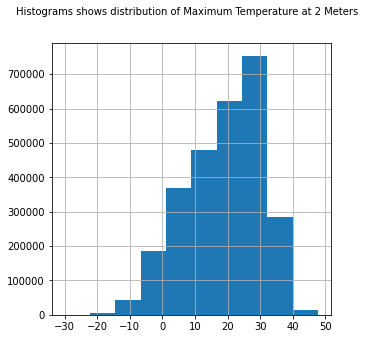

In [ ]:
# Plot for T2M_MAX -> Maximum Temperature at 2 Meters (C)
df['T2M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Temperature at 2 Meters', fontsize=10);
# plt.text(-20, 4e6, 'T2M_MAX', fontsize = 12)

In [ ]:
# sns.histplot(data=df, x='T2M_MAX', stat='count', hue='score', multiple='stack')
df.groupby(['T2M_MAX', 'score'])[['score']].count()

score
T2M_MAX score       
-30.03  0.0        1
-29.71  0.0        1
-29.06  0.0        1
        1.0        1
-29.05  0.0        1
...              ...
 46.72  1.0        1
 47.16  0.0        1
 47.27  0.0        1
 47.47  0.0        1
 47.75  0.0        1

[34742 rows x 1 columns]

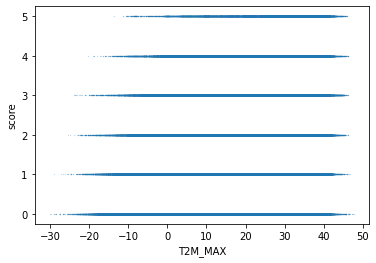

In [ ]:
 # Plot for T2M_MAX -> Maximum Temperature at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2M_MAX', y='score', colormap='viridis', s= 0.01)

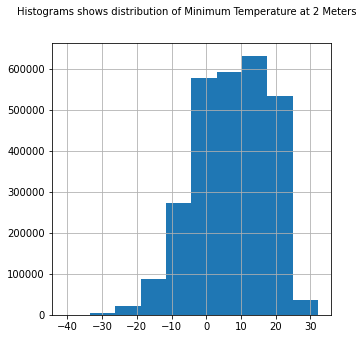

In [ ]:
# Plot for T2M_MIN -> Minimum Temperature at 2 Meters (C)
df['T2M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Temperature at 2 Meters', fontsize=10);
# plt.text(-40, 4e6, 'T2M_MIN', fontsize = 12)

In [ ]:
df.groupby(['T2M_MIN', 'score'])[['score']].count()

,,score
T2M_MIN,score,
-40.85,0.0,1
-39.83,0.0,1
-39.77,0.0,1
-39.30,0.0,1
-39.27,0.0,1
...,...,...
32.03,1.0,1
32.09,0.0,1
32.14,0.0,1


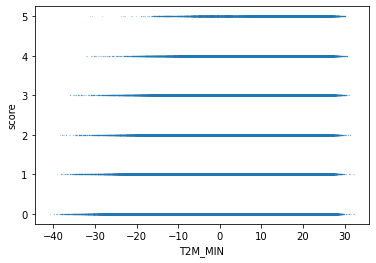

In [ ]:
#Plot for T2M_MIN -> Minimum Temperature at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2M_MIN', y='score', colormap='viridis', s= 0.01)

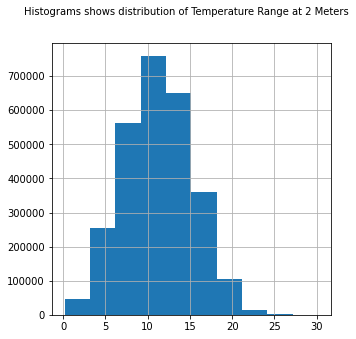

In [ ]:
# Plot for T2M_RANGE -> Temperature Range at 2 Meters (C)
df['T2M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Temperature Range at 2 Meters', fontsize=10);
# plt.text(25, 5e6, 'T2M_RANGE', fontsize = 12)


In [ ]:
df.groupby(['T2M_RANGE', 'score'])[['score']].count()

score
T2M_RANGE score       
0.16      0.0        1
          2.0        1
0.17      0.0        1
          2.0        1
0.21      1.0        1
...                ...
29.72     2.0        1
29.88     3.0        1
29.99     2.0        1
30.13     3.0        2
30.17     4.0        1

[14524 rows x 1 columns]

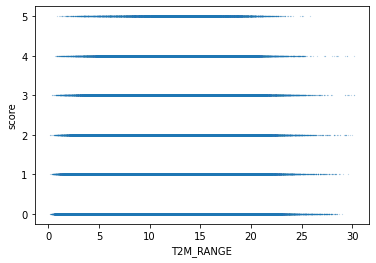

In [ ]:
 # Plot for T2M_RANGE -> Temperature Range at 2 Meters (C) with respect to the target variable
 ax2 = df.plot.scatter(x='T2M_RANGE', y='score', colormap='viridis', s= 0.01)

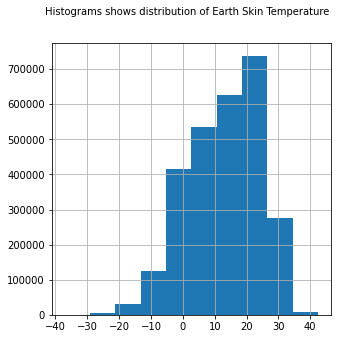

In [ ]:
# Plot for TS -> Earth Skin Temperature (C)
df['TS'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Earth Skin Temperature', fontsize=10);
# plt.text(-30, 4e6, 'TS', fontsize = 12)

In [ ]:
df.groupby(['TS', 'score'])[['score']].count()

,,score
TS,score,
-37.16,0.0,1
-36.18,0.0,1
-35.24,0.0,1
-34.78,0.0,1
-34.76,0.0,1
...,...,...
41.86,2.0,1
41.89,0.0,1
41.91,1.0,1


In [ ]:
df = df[df['TS']>30]

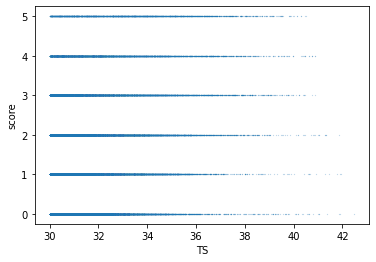

In [ ]:
# Plot for TS -> Earth Skin Temperature (C) with respect to the target variable
ax2 = df.plot.scatter(x='TS', y='score', colormap='viridis', s= 0.01)

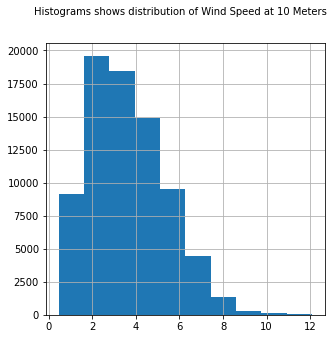

In [ ]:
# Plot for WS10M -> Wind Speed at 10 Meters (m/s)
df['WS10M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed at 10 Meters', fontsize=10);
# plt.text(16, 7e6, 'WS10M', fontsize = 12)

In [ ]:
df.groupby(['WS10M', 'score'])[['score']].count()

score
WS10M score       
0.45  0.0        1
0.46  0.0        2
      2.0        2
0.50  2.0        2
0.51  0.0        1
...            ...
11.67 2.0        1
11.76 2.0        2
11.85 3.0        1
11.99 2.0        1
12.09 3.0        1

[4829 rows x 1 columns]

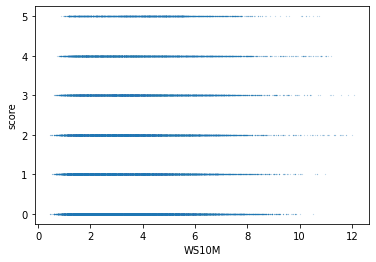

In [ ]:
# Plot for TS -> Earth Skin Temperature (C) with respect to the target variable
ax2 = df.plot.scatter(x='WS10M', y='score', colormap='viridis', s= 0.01)

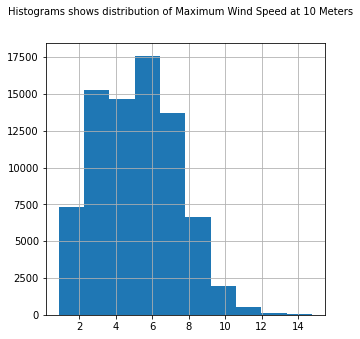

In [ ]:
# Plot for WS10M_MAX -> Maximum Wind Speed at 10 Meters (m/s)
df['WS10M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Wind Speed at 10 Meters', fontsize=10);
# plt.text(25, 7e6, 'WS10M_MAX', fontsize = 12)

In [ ]:
df.groupby(['WS10M_MAX', 'score'])[['score']].count()

score
WS10M_MAX score       
0.86      0.0        1
0.89      0.0        2
0.92      2.0        1
          3.0        1
0.93      0.0        1
...                ...
14.21     3.0        1
14.26     3.0        1
14.37     2.0        2
14.72     2.0        1
14.77     2.0        2

[5862 rows x 1 columns]

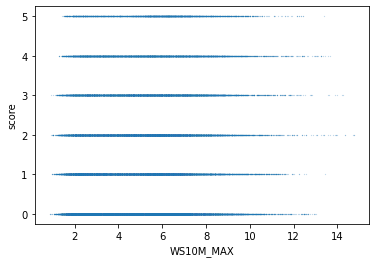

In [ ]:
# Plot for WS10M_MAX -> Maximum Wind Speed at 10 Meters (m/s) with respect to the target variable
ax2 = df.plot.scatter(x='WS10M_MAX', y='score', colormap='viridis', s= 0.01)

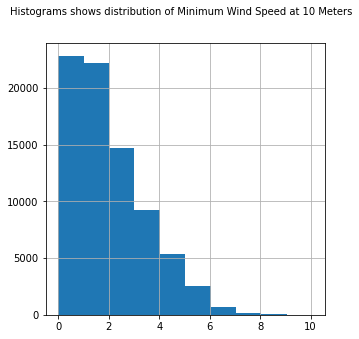

In [ ]:
# Plot for WS10M_MIN -> Minimum Wind Speed at 10 Meters (m/s)
df['WS10M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Wind Speed at 10 Meters', fontsize=10);
# plt.text(12.5, 0.8e7, 'WS10M_MIN', fontsize = 12)

In [ ]:
df.groupby(['WS10M_MIN', 'score'])[['score']].count()

score
WS10M_MIN score       
0.00      1.0        2
          3.0        2
          4.0        1
0.01      0.0        2
          1.0        2
...                ...
9.56      2.0        1
9.67      4.0        1
9.75      3.0        1
10.00     2.0        2
10.06     3.0        1

[4139 rows x 1 columns]

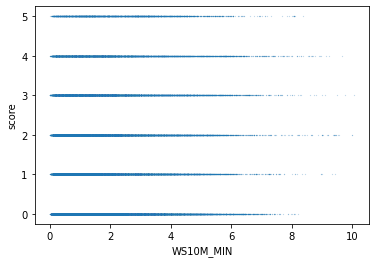

In [ ]:
# Plot for WS10M_MIN -> Minimum Wind Speed at 10 Meters (m/s)  with respect to the target variable
ax2 = df.plot.scatter(x='WS10M_MIN', y='score', colormap='viridis', s= 0.01)

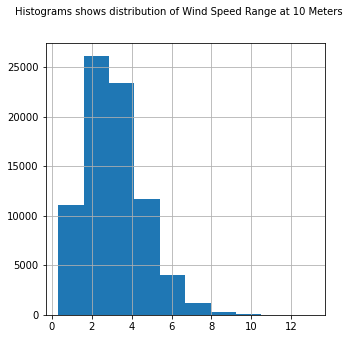

In [ ]:
# Plot for WS10M_RANGE -> Wind Speed Range at 10 Meters (m/s)
df['WS10M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed Range at 10 Meters ', fontsize=10);
# plt.text(19, 0.8e7, 'WS10M_RANGE', fontsize = 12)

In [ ]:
df.groupby(['WS10M_RANGE', 'score'])[['WS10M_RANGE']].count()

WS10M_RANGE
WS10M_RANGE score             
0.34        1.0              1
            2.0              1
0.38        0.0              1
0.39        1.0              2
0.43        0.0              1
...                        ...
11.68       3.0              1
12.03       0.0              1
12.06       0.0              1
12.38       0.0              1
13.03       4.0              1

[4487 rows x 1 columns]

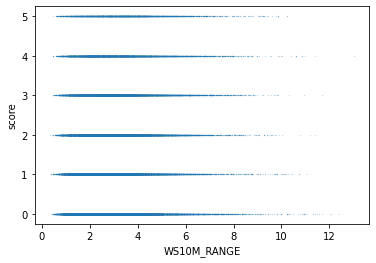

In [ ]:
## Plot for WS10M_RANGE -> Wind Speed Range at 10 Meters (m/s) with respect to the target variable
ax2 = df.plot.scatter(x='WS10M_RANGE', y='score', colormap='viridis', s= 0.01 )

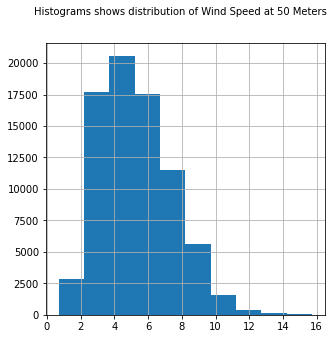

In [ ]:
# Plot for WS50M -> Wind Speed at 50 Meters (m/s)
df['WS50M'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed at 50 Meters', fontsize=10);
# plt.text(23, 0.8e7, 'WS50M', fontsize = 12)

In [ ]:
df.groupby(['WS50M', 'score'])[['score']].count()

score
WS50M score       
0.69  0.0        1
      2.0        2
0.76  1.0        2
0.78  0.0        2
0.79  0.0        1
...            ...
15.22 2.0        2
15.27 2.0        1
15.33 3.0        1
15.63 2.0        1
15.73 3.0        1

[5969 rows x 1 columns]

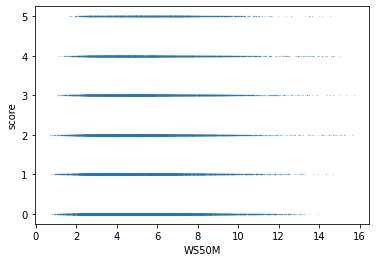

In [ ]:
# Plot for WS50M -> Wind Speed at 50 Meters (m/s) with respect to the target variable
ax2 = df.plot.scatter(x='WS50M', y='score', colormap='viridis', s= 0.01)

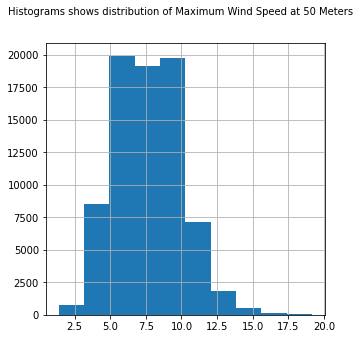

In [ ]:
# Plot for WS50M_MAX -> Maximum Wind Speed at 50 Meters (m/s)
df['WS50M_MAX'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Maximum Wind Speed at 50 Meters', fontsize=10);
# plt.text(30, 1.0e7, 'WS50M_MAX', fontsize = 12)

In [ ]:
df.groupby(['WS50M_MAX', 'score'])[['score']].count()

score
WS50M_MAX score       
1.36      0.0        1
          1.0        2
1.38      0.0        1
1.39      2.0        2
1.44      2.0        1
...                ...
18.57     3.0        1
18.62     2.0        1
18.77     2.0        2
19.16     2.0        1
19.18     2.0        2

[6719 rows x 1 columns]

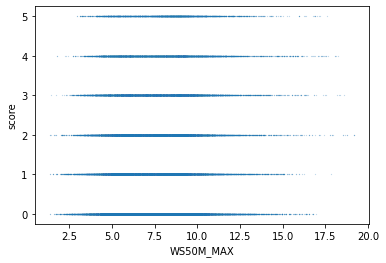

In [ ]:
# Plot for WS50M_MAX -> Maximum Wind Speed at 50 Meters (m/s) with respect to target variable
ax2 = df.plot.scatter(x='WS50M_MAX', y='score', colormap='viridis', s= 0.01)

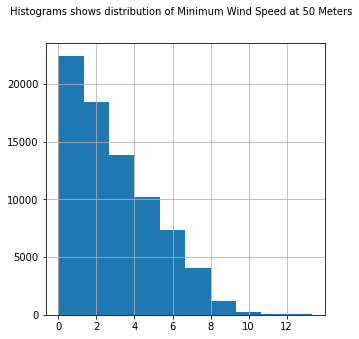

In [ ]:
# Plot for WS50M_MIN -> Minimum Wind Speed at 50 Meters (m/s)
df['WS50M_MIN'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Minimum Wind Speed at 50 Meters', fontsize=10);
# plt.text(15, 6e6, 'WS50M_MIN', fontsize = 12)

In [ ]:
df.groupby(['WS50M_MIN', 'score'])[['score']].count()

score
WS50M_MIN score       
0.00      0.0        4
          3.0        1
0.01      0.0       10
          2.0        3
          3.0        2
...                ...
12.94     2.0        1
          3.0        2
12.96     2.0        1
13.25     1.0        1
13.33     3.0        1

[5529 rows x 1 columns]

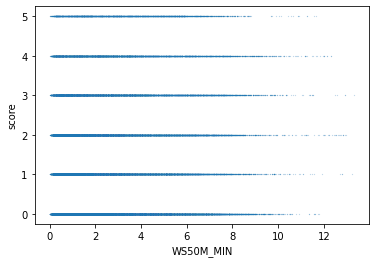

In [ ]:
# Plot for WS50M_MIN -> Minimum Wind Speed at 50 Meters (m/s) with respect to the target variable
ax2 = df.plot.scatter(x='WS50M_MIN', y='score', colormap='viridis', s= 0.01)

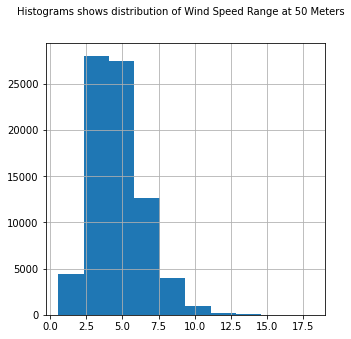

In [ ]:
# Plot for WS50M_RANGE -> Wind Speed Range at 50 Meters (m/s)
df['WS50M_RANGE'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Wind Speed Range at 50 Meters', fontsize=10);
# plt.text(20, 0.8e7, 'WS50M_RANGE', fontsize = 12)

In [ ]:
df.groupby(['WS50M_RANGE', 'score'])[['score']].count()

score
WS50M_RANGE score       
0.58        1.0        1
0.71        1.0        1
0.86        4.0        2
0.88        2.0        1
            3.0        2
...                  ...
15.63       3.0        1
15.78       0.0        1
            4.0        1
16.57       0.0        1
18.09       4.0        1

[5455 rows x 1 columns]

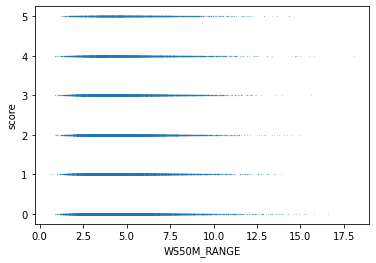

In [ ]:
# Plot for WS50M_RANGE -> Wind Speed Range at 50 Meters (m/s) with respect to the target variable
ax2 = df.plot.scatter(x='WS50M_RANGE', y='score', colormap='viridis', s= 0.01)

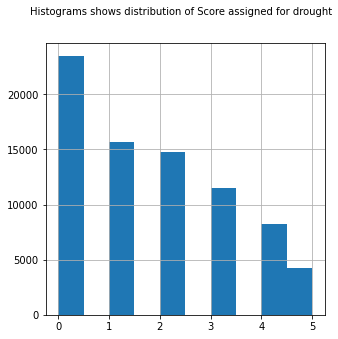

In [ ]:
# Plot for score -> Score assigned for drought
df['score'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of Score assigned for drought', fontsize=10);
# plt.text(4.2, 1.4e6, 'score', fontsize = 12)

In [ ]:
df['date']= pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77877 entries, 185 to 1297232
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   fips         77877 non-null  int64         
 1   date         77877 non-null  datetime64[ns]
 2   PRECTOT      77877 non-null  float64       
 3   PS           77877 non-null  float64       
 4   QV2M         77877 non-null  float64       
 5   T2M          77877 non-null  float64       
 6   T2MDEW       77877 non-null  float64       
 7   T2MWET       77877 non-null  float64       
 8   T2M_MAX      77877 non-null  float64       
 9   T2M_MIN      77877 non-null  float64       
 10  T2M_RANGE    77877 non-null  float64       
 11  TS           77877 non-null  float64       
 12  WS10M        77877 non-null  float64       
 13  WS10M_MAX    77877 non-null  float64       
 14  WS10M_MIN    77877 non-null  float64       
 15  WS10M_RANGE  77877 non-null  float64       
 16  

In [ ]:
df['date']
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['week'] = df['date'].dt.week
df['day'] = df['date'].dt.day
df


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


,fips,date,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
185,1001,2000-07-04,0.03,100.31,12.93,29.71,17.93,17.93,37.55,22.42,15.14,30.07,1.57,2.40,1.10,1.30,2.96,4.96,1.59,3.36,3.0,2000,7,27,4
192,1001,2000-07-11,0.30,99.99,15.87,31.10,21.19,21.18,37.89,24.80,13.09,31.47,1.98,2.86,1.01,1.85,3.77,4.96,1.64,3.32,3.0,2000,7,28,11
199,1001,2000-07-18,0.00,100.14,10.51,30.31,14.53,14.53,38.94,20.00,18.94,30.58,2.06,3.14,1.15,1.99,3.82,5.32,1.49,3.82,4.0,2000,7,29,18
241,1001,2000-08-29,0.01,99.82,13.64,31.07,18.78,18.78,39.23,24.55,14.69,31.48,2.35,3.15,1.70,1.46,4.77,6.11,2.82,3.29,5.0,2000,8,35,29
2376,1001,2006-07-04,1.80,100.25,14.41,30.29,19.66,19.66,36.67,22.74,13.94,30.39,1.29,1.70,0.80,0.90,2.37,4.16,1.34,2.82,2.0,2006,7,27,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1295055,56043,2001-08-07,0.41,83.52,9.58,28.39,10.51,10.51,35.80,21.12,14.68,30.46,3.06,4.77,0.64,4.12,4.58,6.32,0.78,5.55,3.0,2001,8,32,7
1295398,56043,2002-07-16,0.89,83.15,9.28,28.02,9.58,9.58,36.86,18.96,17.90,30.62,2.51,4.96,0.71,4.25,3.72,7.08,0.94,6.14,4.0,2002,7,29,16
1295790,56043,2003-08-12,0.02,83.25,8.32,28.63,8.38,8.38,37.07,20.51,16.55,30.06,2.39,3.98,0.99,2.99,3.52,6.94,1.74,5.19,3.0,2003,8,33,12
1296861,56043,2006-07-18,0.20,83.18,6.24,28.89,4.09,4.09,38.18,19.54,18.63,30.26,3.55,4.93,2.24,2.68,5.60,9.11,3.19,5.92,2.0,2006,7,29,18


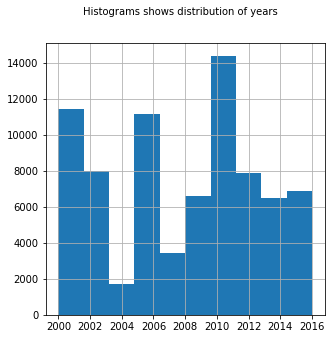

In [ ]:
# Distribution of data according to the year. Data from 2000 to 2016 is been used
df['year'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of years', fontsize=10);

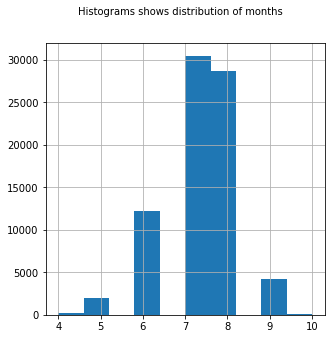

In [ ]:
# Distribution of data according to month
df['month'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of months', fontsize=10);

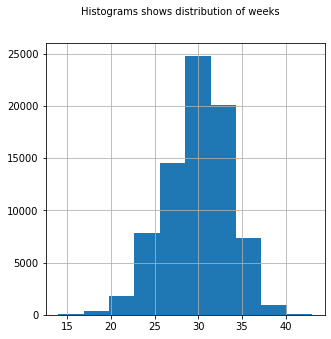

In [ ]:
# Distribution of data according to week
df['week'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of weeks', fontsize=10);

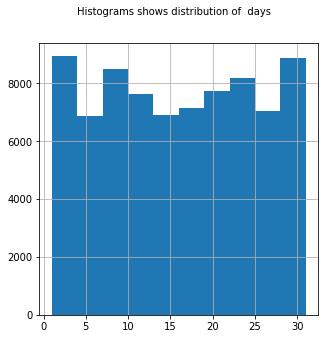

In [ ]:
# Distribution of data according to day
df['day'].hist(figsize=(5,5))
plt.suptitle('Histograms shows distribution of  days', fontsize=10);

In [ ]:
# Correlation matrix plot
corealtion_matrix = df.corr()
corealtion_matrix

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
fips,1.000000,-0.057942,-0.104166,0.036827,-0.035788,0.056190,0.055890,-0.076970,0.036424,-0.085247,0.109544,0.351739,0.346802,0.291494,0.222233,0.324720,0.335203,0.262578,0.116800,0.005794,0.008911,-0.046321,-0.037325,0.016032
PRECTOT,-0.057942,1.000000,0.086157,0.262928,-0.111960,0.223812,0.224008,-0.221066,0.132294,-0.264215,-0.166011,-0.132543,-0.109413,-0.145477,-0.015629,-0.143694,-0.128286,-0.141102,0.005543,-0.012724,0.016803,0.000144,0.007337,0.029887
PS,-0.104166,0.086157,1.000000,0.683033,0.138355,0.730546,0.731083,-0.127037,0.477353,-0.433047,-0.078597,-0.384509,-0.461919,-0.236007,-0.451051,-0.369270,-0.489322,-0.185282,-0.415434,-0.051535,0.037325,0.121151,0.121039,-0.003542
QV2M,0.036827,0.262928,0.683033,1.000000,-0.094610,0.979268,0.979593,-0.448385,0.497852,-0.696744,-0.283952,-0.268419,-0.341642,-0.145290,-0.363421,-0.268089,-0.381605,-0.107874,-0.369291,-0.201055,0.124962,0.143646,0.135767,-0.026158
T2M,-0.035788,-0.111960,0.138355,-0.094610,1.000000,-0.040505,-0.040935,0.787714,0.631722,0.168563,0.894569,0.030629,0.025467,0.023400,0.014287,0.046501,0.049805,0.021359,0.039190,0.182773,0.035938,0.134541,0.136626,0.012751
T2MDEW,0.056190,0.223812,0.730546,0.979268,-0.040505,1.000000,0.999995,-0.389230,0.507582,-0.657662,-0.231240,-0.256550,-0.337709,-0.127478,-0.375674,-0.249093,-0.366386,-0.088385,-0.373345,-0.170253,0.104133,0.160228,0.155294,-0.020766
T2MWET,0.055890,0.224008,0.731083,0.979593,-0.040935,0.999995,1.000000,-0.389784,0.507628,-0.658124,-0.231762,-0.257004,-0.338173,-0.127842,-0.375998,-0.249581,-0.366971,-0.088709,-0.373715,-0.170420,0.104280,0.160110,0.155157,-0.020805
T2M_MAX,-0.076970,-0.221066,-0.127037,-0.448385,0.787714,-0.389230,-0.389784,1.000000,0.085521,0.715986,0.729412,0.079601,0.105532,0.035802,0.121503,0.125185,0.197087,0.031167,0.221076,0.182332,-0.019337,0.014984,0.015771,0.009680
T2M_MIN,0.036424,0.132294,0.477353,0.497852,0.631722,0.507582,0.507628,0.085521,1.000000,-0.634323,0.490524,-0.040048,-0.077190,-0.000637,-0.114910,-0.064228,-0.156804,0.015872,-0.226207,0.053470,0.094599,0.248104,0.257326,0.017508
T2M_RANGE,-0.085247,-0.264215,-0.433047,-0.696744,0.168563,-0.657662,-0.658124,0.715986,-0.634323,1.000000,0.222262,0.089817,0.135959,0.028217,0.174784,0.142129,0.262784,0.013054,0.330034,0.104015,-0.081292,-0.162223,-0.168076,-0.004762


In [ ]:
corealtion_matrix.style.background_gradient(cmap='coolwarm')

,fips,PRECTOT,PS,QV2M,T2M,T2MDEW,T2MWET,T2M_MAX,T2M_MIN,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE,score,year,month,week,day
fips,1.000000,-0.057942,-0.104166,0.036827,-0.035788,0.056190,0.055890,-0.076970,0.036424,-0.085247,0.109544,0.351739,0.346802,0.291494,0.222233,0.324720,0.335203,0.262578,0.116800,0.005794,0.008911,-0.046321,-0.037325,0.016032
PRECTOT,-0.057942,1.000000,0.086157,0.262928,-0.111960,0.223812,0.224008,-0.221066,0.132294,-0.264215,-0.166011,-0.132543,-0.109413,-0.145477,-0.015629,-0.143694,-0.128286,-0.141102,0.005543,-0.012724,0.016803,0.000144,0.007337,0.029887
PS,-0.104166,0.086157,1.000000,0.683033,0.138355,0.730546,0.731083,-0.127037,0.477353,-0.433047,-0.078597,-0.384509,-0.461919,-0.236007,-0.451051,-0.369270,-0.489322,-0.185282,-0.415434,-0.051535,0.037325,0.121151,0.121039,-0.003542
QV2M,0.036827,0.262928,0.683033,1.000000,-0.094610,0.979268,0.979593,-0.448385,0.497852,-0.696744,-0.283952,-0.268419,-0.341642,-0.145290,-0.363421,-0.268089,-0.381605,-0.107874,-0.369291,-0.201055,0.124962,0.143646,0.135767,-0.026158
T2M,-0.035788,-0.111960,0.138355,-0.094610,1.000000,-0.040505,-0.040935,0.787714,0.631722,0.168563,0.894569,0.030629,0.025467,0.023400,0.014287,0.046501,0.049805,0.021359,0.039190,0.182773,0.035938,0.134541,0.136626,0.012751
T2MDEW,0.056190,0.223812,0.730546,0.979268,-0.040505,1.000000,0.999995,-0.389230,0.507582,-0.657662,-0.231240,-0.256550,-0.337709,-0.127478,-0.375674,-0.249093,-0.366386,-0.088385,-0.373345,-0.170253,0.104133,0.160228,0.155294,-0.020766
T2MWET,0.055890,0.224008,0.731083,0.979593,-0.040935,0.999995,1.000000,-0.389784,0.507628,-0.658124,-0.231762,-0.257004,-0.338173,-0.127842,-0.375998,-0.249581,-0.366971,-0.088709,-0.373715,-0.170420,0.104280,0.160110,0.155157,-0.020805
T2M_MAX,-0.076970,-0.221066,-0.127037,-0.448385,0.787714,-0.389230,-0.389784,1.000000,0.085521,0.715986,0.729412,0.079601,0.105532,0.035802,0.121503,0.125185,0.197087,0.031167,0.221076,0.182332,-0.019337,0.014984,0.015771,0.009680
T2M_MIN,0.036424,0.132294,0.477353,0.497852,0.631722,0.507582,0.507628,0.085521,1.000000,-0.634323,0.490524,-0.040048,-0.077190,-0.000637,-0.114910,-0.064228,-0.156804,0.015872,-0.226207,0.053470,0.094599,0.248104,0.257326,0.017508
T2M_RANGE,-0.085247,-0.264215,-0.433047,-0.696744,0.168563,-0.657662,-0.658124,0.715986,-0.634323,1.000000,0.222262,0.089817,0.135959,0.028217,0.174784,0.142129,0.262784,0.013054,0.330034,0.104015,-0.081292,-0.162223,-0.168076,-0.004762


# Feature Selection

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from numpy import array 
from sklearn import feature_selection


train_cols = df.columns[0:-5]
target = df.columns[-5]

x = df[['PRECTOT', 'PS', 'QV2M', 'T2M', 'T2MDEW', 'T2MWET',
       'T2M_MAX', 'T2M_MIN', 'T2M_RANGE', 'TS', 'WS10M', 'WS10M_MAX',
       'WS10M_MIN', 'WS10M_RANGE', 'WS50M', 'WS50M_MAX', 'WS50M_MIN',
       'WS50M_RANGE', 'year', 'month']]
y = df['score']

In [ ]:
# K best features are selected. 
select_features = SelectKBest(score_func=f_regression, k=7)
z = select_features.fit_transform(x, y) 
z.shape

features = array(df.columns)
features = features[features!='score']

filter = select_features.get_support()

print("All features:")
print(features)
 
print("\n\n Selected best 7:")
print(filter)

All features:
['fips' 'date' 'PRECTOT' 'PS' 'QV2M' 'T2M' 'T2MDEW' 'T2MWET' 'T2M_MAX'
 'T2M_MIN' 'T2M_RANGE' 'TS' 'WS10M' 'WS10M_MAX' 'WS10M_MIN' 'WS10M_RANGE'
 'WS50M' 'WS50M_MAX' 'WS50M_MIN' 'WS50M_RANGE' 'year' 'month' 'week' 'day']


 Selected best 7:
[False False  True  True  True  True  True False  True  True False False
 False False False False False False False False]
